<a href="https://colab.research.google.com/github/Matvej911/Matvejs_Aleksejevs_DLBAIPNLP01/blob/main/simple_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from bs4 import BeautifulSoup
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from xgboost import XGBClassifier
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, f1_score, roc_curve
import plotly.graph_objects as go
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet, stopwords
from nltk.tokenize import word_tokenize
import nltk
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns


# Download required NLTK packages
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

####Load and Preview CSV Data

In [2]:

df1 = pd.read_csv('dataset_small_1.csv')
df1.head()


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


####Keep only the 'text' and 'label_num' columns

In [3]:
df1 = df1[['label_num','text']]
df1.rename(columns={'text': 'Message', 'label_num': 'Category'}, inplace=True)

df1.head()


<ipython-input-3-f582299e4397>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={'text': 'Message', 'label_num': 'Category'}, inplace=True)


,Category,Message
0,0,Subject: enron methanol ; meter # : 988291\r\n...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,1,"Subject: photoshop , windows , office . cheap ..."
4,0,Subject: re : indian springs\r\nthis deal is t...


In [4]:
df2 = pd.read_csv('dataset_small_2.csv')
df2.head()


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


####Map Categories to Numeric Values

In [5]:
df2['Category'] = df2['Category'].map({'ham': 0, 'spam': 1})

df2.head()


,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


####Combine DataFrames and Shuffle

In [6]:
combined_df = pd.concat([df1, df2], ignore_index=True)
df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

df.sample(9)


,Category,Message
1150,0,You need to get up. Now.
10125,0,Subject: tenaska iv 11 / 00\r\ni am having tro...
8640,1,Dorothy@kiefer.com (Bank of Granite issues Str...
4184,0,Apps class varaya elaya.
10109,0,Subject: cornshucker\r\nhere are the points th...
3665,0,I am in escape theatre now. . Going to watch K...
10254,0,I came hostel. I m going to sleep. Plz call me...
291,0,Reading gud habit.. Nan bari hudgi yorge patai...
7360,0,Subject: some after thoughts to our meeting\r\...


In [7]:
df.isnull().sum()

,0
Category,0
Message,0


####Drop null Message

In [8]:
df = df.dropna(subset=['Message'])

####Check and Remove Duplicates

In [9]:
df.duplicated().sum()

593

In [10]:
df.drop_duplicates(inplace=True)

####Visualize Distribution of Ham and Spam Messages

<ipython-input-11-1ce2ad142f2a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


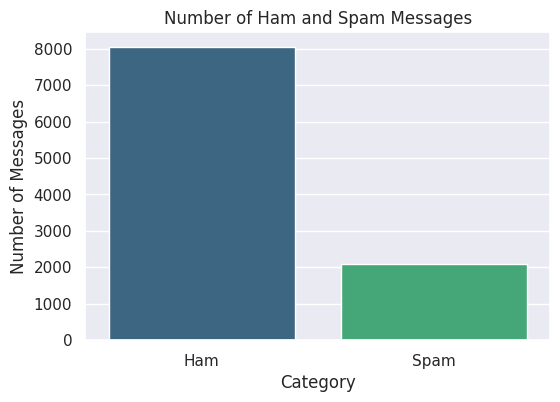

In [11]:
category_counts = df['Category'].value_counts()

sns.set(style="darkgrid")
plt.figure(figsize=(6, 4))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')

plt.xlabel('Category')
plt.ylabel('Number of Messages')
plt.title('Number of Ham and Spam Messages')
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'])

plt.show()


####Lower Casing

In [12]:
def to_lowercase(text):
    return text.lower()


####Remove Extra White Spaces

In [13]:
def remove_extra_whitespaces(text):
    return re.sub(r'\s+', ' ', text).strip()


####Remove HTML Tags

In [14]:
def remove_html_tags(text):
    return BeautifulSoup(text, "html.parser").get_text()


####Remove URLs

In [15]:
def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)


####Remove Punctuations

In [16]:
import string

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))


#### Remove Special Characters

In [17]:
def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)


####Remove Numeric Values

In [18]:
def remove_numeric_values(text):
    return re.sub(r'\d+', '', text)


####Remove Non-alpha Numeric

In [19]:
def remove_non_alpha_numeric(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)


####Replace Abbreviations in Text

In [20]:
abbreviations = {
    "$": "dollar",
    "€": "euro",
    "4ao": "for adults only",
    "a.m": "before midday",
    "a3": "anytime, anywhere, anyplace",
    "aamof": "as a matter of fact",
    "acct": "account",
    "adih": "another day in hell",
    "afaic": "as far as i am concerned",
    "afaict": "as far as i can tell",
    "afaik": "as far as i know",
    "afair": "as far as i remember",
    "afk": "away from keyboard",
    "app": "application",
    "approx": "approximately",
    "apps": "applications",
    "asap": "as soon as possible",
    "asl": "age, sex, location",
    "atk": "at the keyboard",
    "ave.": "avenue",
    "aymm": "are you my mother",
    "ayor": "at your own risk",
    "b&b": "bed and breakfast",
    "b.c": "before christ",
    "b2b": "business to business",
    "b2c": "business to customer",
    "b4": "before",
    "b4n": "bye for now",
    "b@u": "back at you",
    "bae": "before anyone else",
    "bak": "back at keyboard",
    "bbbg": "bye bye be good",
    "bbc": "british broadcasting corporation",
    "bbias": "be back in a second",
    "bbl": "be back later",
    "bbs": "be back soon",
    "blvd": "boulevard",
    "bout": "about",
    "brb": "be right back",
    "bros": "brothers",
    "brt": "be right there",
    "bsaaw": "big smile and a wink",
    "btw": "by the way",
    "bwl": "bursting with laughter",
    "c/o": "care of",
    "cet": "central european time",
    "cf": "compare",
    "cia": "central intelligence agency",
    "csl": "can't stop laughing",
    "cu": "see you",
    "cul8r": "see you later",
    "cv": "curriculum vitae",
    "cwot": "complete waste of time",
    "cya": "see you",
    "cyt": "see you tomorrow",
    "dae": "does anyone else",
    "dbmib": "do not bother me i am busy",
    "diy": "do it yourself",
    "dm": "direct message",
    "dwh": "during work hours",
    "e123": "easy as one two three",
    "eet": "eastern european time",
    "eg": "example",
    "embm": "early morning business meeting",
    "encl": "enclosed",
    "etc": "and so on",
    "faq": "frequently asked questions",
    "fawc": "for anyone who cares",
    "fb": "facebook",
    "fc": "fingers crossed",
    "fig": "figure",
    "fimh": "forever in my heart",
    "ft.": "feet",
    "ft": "featuring",
    "ftl": "for the loss",
    "ftw": "for the win",
    "fwiw": "for what it's worth",
    "fyi": "for your information",
    "g9": "genius",
    "gahoy": "get a hold of yourself",
    "gal": "get a life",
    "gcse": "general certificate of secondary education",
    "gfn": "gone for now",
    "gg": "good game",
    "gl": "good luck",
    "glhf": "good luck have fun",
    "gmt": "greenwich mean time",
    "gmta": "great minds think alike",
    "gn": "good night",
    "g.o.a.t": "greatest of all time",
    "goi": "get over it",
    "gps": "global positioning system",
    "gr8": "great",
    "gratz": "congratulations",
    "gyal": "girl",
    "h&c": "hot and cold",
    "hp": "horsepower",
    "hr": "hour",
    "hrh": "his royal highness",
    "ht": "height",
    "ibrb": "i will be right back",
    "ic": "i see",
    "icq": "i seek you",
    "icymi": "in case you missed it",
    "idc": "i don't care",
    "idgadf": "i don't give a damn fuck",
    "idgaf": "i don't give a fuck",
    "idk": "i don't know",
    "ie": "that is",
    "ifyp": "i feel your pain",
    "IG": "instagram",
    "iirc": "if i remember correctly",
    "ilu": "i love you",
    "ily": "i love you",
    "imho": "in my humble opinion",
    "imo": "in my opinion",
    "imu": "i miss you",
    "iow": "in other words",
    "irl": "in real life",
    "j4f": "just for fun",
    "jic": "just in case",
    "jk": "just kidding",
    "jsyk": "just so you know",
    "l8r": "later",
    "lb": "pound",
    "lbs": "pounds",
    "ldr": "long distance relationship",
    "lmao": "laugh my ass off",
    "lmfao": "laugh my fucking ass off",
    "lol": "laughing out loud",
    "ltd": "limited",
    "ltns": "long time no see",
    "m8": "mate",
    "mf": "motherfucker",
    "mfs": "motherfuckers",
    "mfw": "my face when",
    "mofo": "motherfucker",
    "mph": "miles per hour",
    "mr": "mister",
    "mrw": "my reaction when",
    "ms": "miss",
    "mte": "my thoughts exactly",
    "nagi": "not a good idea",
    "nbc": "national broadcasting company",
    "nbd": "no big deal",
    "nfs": "not for sale",
    "ngl": "not going to lie",
    "nhs": "national health service",
    "nrn": "no reply necessary",
    "nsfl": "not safe for life",
    "nsfw": "not safe for work",
    "nth": "nice to have",
    "nvr": "never",
    "nyc": "new york city",
    "oc": "original content",
    "og": "original",
    "ohp": "overhead projector",
    "oic": "oh i see",
    "omdb": "over my dead body",
    "omg": "oh my god",
    "omw": "on my way",
    "p.a": "per annum",
    "p.m": "after midday",
    "pm": "prime minister",
    "poc": "people of color",
    "pov": "point of view",
    "pp": "pages",
    "ppl": "people",
    "prw": "parents are watching",
    "ps": "postscript",
    "pt": "point",
    "ptb": "please text back",
    "pto": "please turn over",
    "qpsa": "que pasa?",
    "ratchet": "rude",
    "rbtl": "read between the lines",
    "rlrt": "real life retweet",
    "rofl": "rolling on the floor laughing",
    "roflol": "rolling on the floor laughing out loud",
    "rotflmao": "rolling on the floor laughing my ass off",
    "rt": "retweet",
    "ruok": "are you ok",
    "sfw": "safe for work",
    "sk8": "skate",
    "smh": "shake my head",
    "sq": "square",
    "srsly": "seriously",
    "ssdd": "same stuff different day",
    "tbh": "to be honest",
    "tbs": "tablespoonful",
    "tbsp": "tablespoonful",
    "tfw": "that feeling when",
    "thks": "thank you",
    "tho": "though",
    "thx": "thank you",
    "tia": "thanks in advance",
    "til": "today i learned",
    "tl;dr": "too long didn't read",
    "tldr": "too long didn't read",
    "tmb": "tweet me back",
    "tntl": "trying not to laugh",
    "ttfn": "ta-ta for now!",
    "ttyl": "talk to you later",
    "u": "you",
    "u2": "you too",
    "u4e": "yours forever",
    "utc": "coordinated universal time",
    "w/": "with",
    "w/e": "whatever",
    "w/o": "without",
    "w8": "wait",
    "wb": "welcome back",
    "wtf": "what the fuck",
    "wtg": "way to go",
    "wtpa": "where the party at",
    "wuf": "where are you from",
    "wuzup": "what is up",
    "wywh": "wish you were here",
    "yd": "yard",
    "ygtr": "you got that right",
    "ynk": "you never know",
    "zzz": "sleeping, bored, tired"
}



In [21]:
def replace_abbreviations(text, abbr_dict):
    for key, value in abbr_dict.items():
        text = text.replace(key, value)
    return text


In [22]:
df

,Category,Message
0,0,I called and said all to him:)then he have to ...
1,0,Subject: re : nom / alloc for june 6 th\r\nwe ...
2,1,Subject: can you facilitate ?\r\npardon the ab...
3,0,Oh you got many responsibilities.
4,1,Subject: re [ 3 ]\r\npaint shop small world ! ...
...,...,...
10738,0,Geeeee ... I love you so much I can barely sta...
10739,0,Is that seriously how you spell his name?
10740,0,I have to take exam with march 3
10741,0,"Subject: re : meter 1459 , 6 / 00\r\nyep , you..."


In [23]:
df['Processed_Message'] = df['Message'].apply(lambda x: replace_abbreviations(x, abbreviations))
df['Processed_Message'] = df['Processed_Message'].apply(to_lowercase)
df['Processed_Message'] = df['Processed_Message'].apply(remove_extra_whitespaces)
df['Processed_Message'] = df['Processed_Message'].apply(remove_html_tags)
df['Processed_Message'] = df['Processed_Message'].apply(remove_urls)
df['Processed_Message'] = df['Processed_Message'].apply(remove_punctuation)
df['Processed_Message'] = df['Processed_Message'].apply(remove_special_characters)
df['Processed_Message'] = df['Processed_Message'].apply(remove_numeric_values)
df['Processed_Message'] = df['Processed_Message'].apply(remove_non_alpha_numeric)


df[['Category', 'Processed_Message']]

<ipython-input-14-c4b95761a3b5>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()


,Category,Processed_Message
0,0,i called and said all to himthen he have to ch...
1,0,syoubject re nom alloriginal content for jyo...
2,1,syoubject can yoyou facilitate pardon the abr...
3,0,oh yoyou got many responsibilitthat iss
4,1,syoubject re paint shop small world coyoul...
...,...,...
10738,0,geeeee i love yoyou so myouch i can barely st...
10739,0,is that serioyously how yoyou spell his name
10740,0,i have to take exam with march
10741,0,syoubject re meter yep yoyou re righei...


####Tokenize Messages
This function splits each message in the Processed_Message column into individual tokens (words)

In [24]:
def tokinize(text):
  tokens = word_tokenize(text)
  return tokens

df['Message_tokens'] = df['Processed_Message'].apply(tokinize)


####Remove Stop Words from Tokens
This function filters out common stop words from the tokenized messages

In [25]:
stop_words = set(stopwords.words('english'))

def rem_stop_word(tokens):
  clean_tokens = [word for word in tokens if word not in stop_words]
  return clean_tokens

df['Message_tokens_with_stop'] = df['Message_tokens'].apply(rem_stop_word)

In [26]:
df['Num_Tokens_Before'] = df['Message_tokens'].apply(len)
df['Num_Tokens_After'] = df['Message_tokens_with_stop'].apply(len)

In [27]:
token_summary = df[['Processed_Message', 'Num_Tokens_Before', 'Num_Tokens_After']]

token_summary.head()

,Processed_Message,Num_Tokens_Before,Num_Tokens_After
0,i called and said all to himthen he have to ch...,13,5
1,syoubject re nom alloriginal content for jyo...,49,41
2,syoubject can yoyou facilitate pardon the abr...,326,170
3,oh yoyou got many responsibilitthat iss,6,6
4,syoubject re paint shop small world coyoul...,16,10


In [28]:
newdf = df[['Category', 'Processed_Message']]
newdf

,Category,Processed_Message
0,0,i called and said all to himthen he have to ch...
1,0,syoubject re nom alloriginal content for jyo...
2,1,syoubject can yoyou facilitate pardon the abr...
3,0,oh yoyou got many responsibilitthat iss
4,1,syoubject re paint shop small world coyoul...
...,...,...
10738,0,geeeee i love yoyou so myouch i can barely st...
10739,0,is that serioyously how yoyou spell his name
10740,0,i have to take exam with march
10741,0,syoubject re meter yep yoyou re righei...


####Distribution of Average Word Length in Spam and non-spam Messages

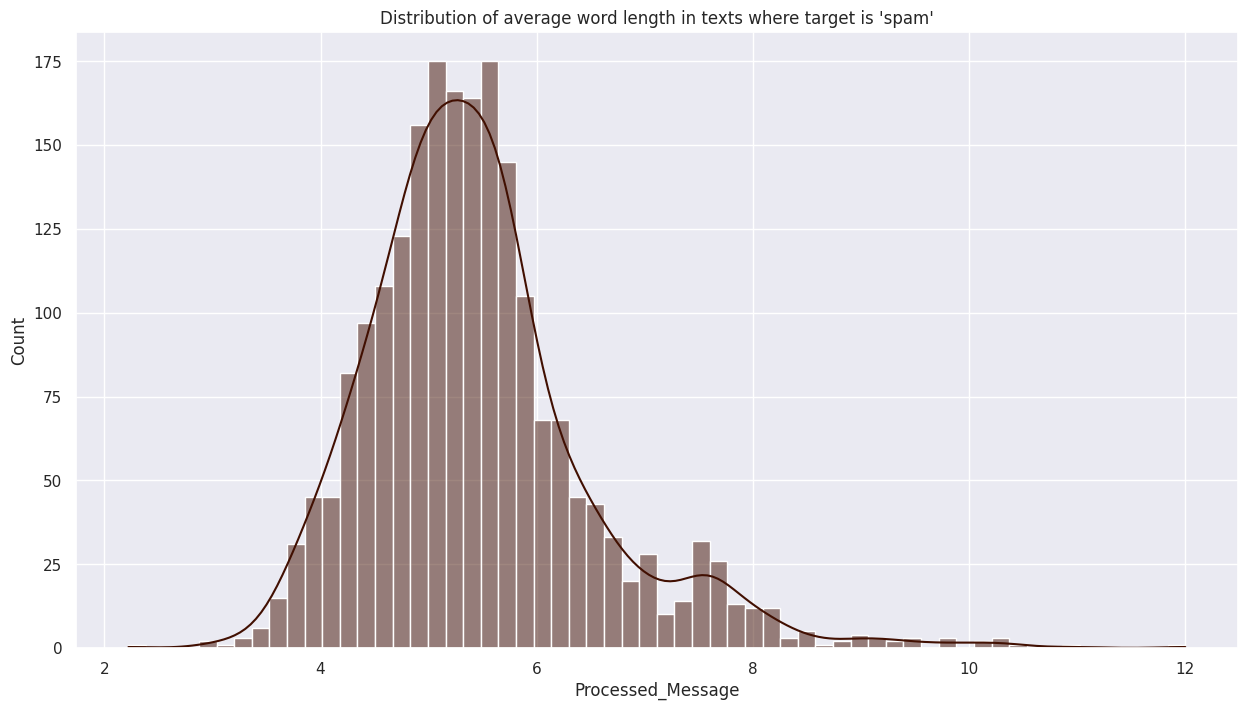

In [29]:
fig, ax = plt.subplots(figsize=(15, 8))
text_words = df[df["Category"] == 1]["Processed_Message"].str.split().apply(lambda x: [len(i) for i in x])
sns.histplot(text_words.map(lambda x: np.mean(x)), kde=True, color="#410F01", ax=ax)
ax.set_title("Distribution of average word length in texts where target is 'spam'")
plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


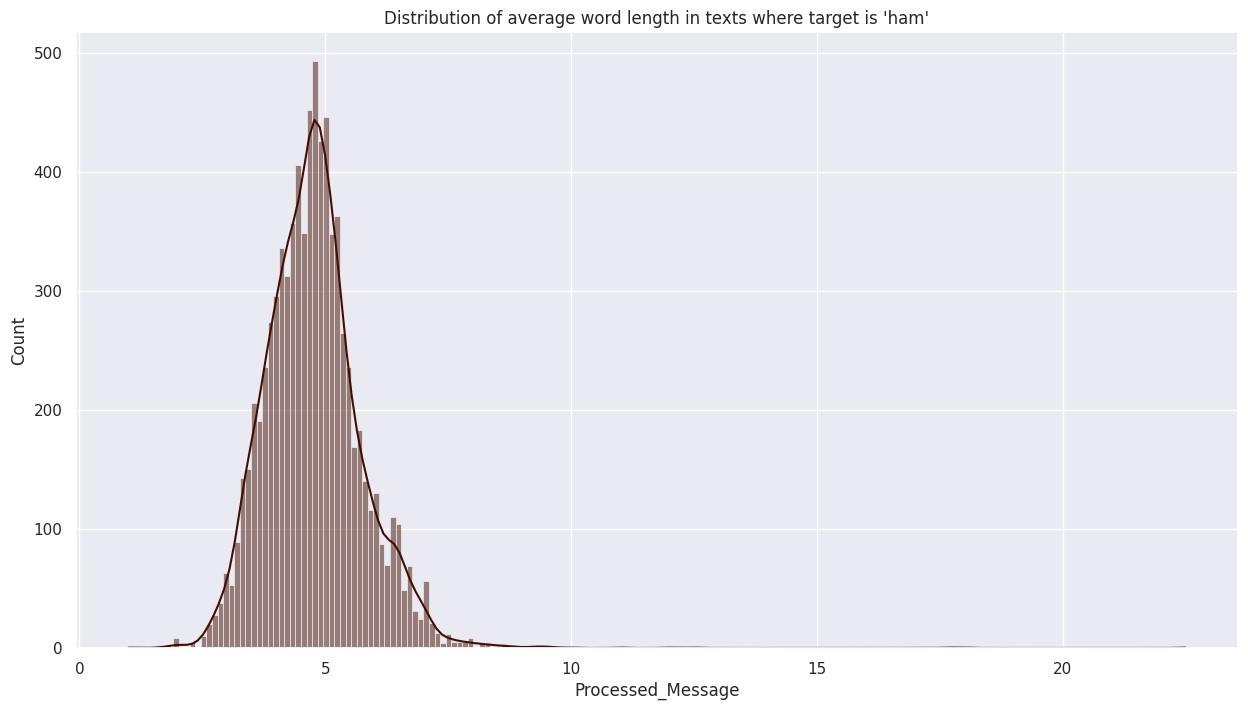

In [30]:
fig, ax = plt.subplots(figsize=(15, 8))
text_words = df[df["Category"] == 0]["Processed_Message"].str.split().apply(lambda x: [len(i) for i in x])
sns.histplot(text_words.map(lambda x: np.mean(x)), kde=True, color="#410F01", ax=ax)
ax.set_title("Distribution of average word length in texts where target is 'ham'")
plt.show()

####Lemmatize Tokenized Text
This code defines a function to lemmatize text by converting it into tokens, determining the appropriate part of speech for each token, and then lemmatizing them.

In [31]:
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {
        "J": wordnet.ADJ,
        "N": wordnet.NOUN,
        "V": wordnet.VERB,
        "R": wordnet.ADV
    }
    return tag_dict.get(tag, wordnet.NOUN)

def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [
        lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens
    ]
    return ' '.join(lemmatized_tokens)


newdf = df[['Category', 'Processed_Message']].copy()
newdf['Processed_Message'] = newdf['Processed_Message'].apply(lemmatize_text)

In [32]:
newdf

,Category,Processed_Message
0,0,i call and say all to himthen he have to choos...
1,0,syoubject re nom alloriginal content for jyoun...
2,1,syoubject can yoyou facilitate pardon the abry...
3,0,oh yoyou get many responsibilitthat i
4,1,syoubject re paint shop small world coyould i ...
...,...,...
10738,0,geeeee i love yoyou so myouch i can barely sta...
10739,0,be that serioyously how yoyou spell his name
10740,0,i have to take exam with march
10741,0,syoubject re meter yep yoyou re righeight exce...


####Visualize Top 30 Words in Ham and Spam Messages

Separate messages into "ham" and "spam" categories, tokenizes them, and counts word frequencies. Identifies the 30 most common words for each category and plot histograms to visualize their frequencies.
The histograms help in understanding the distinguishing words in ham vs spam messages.

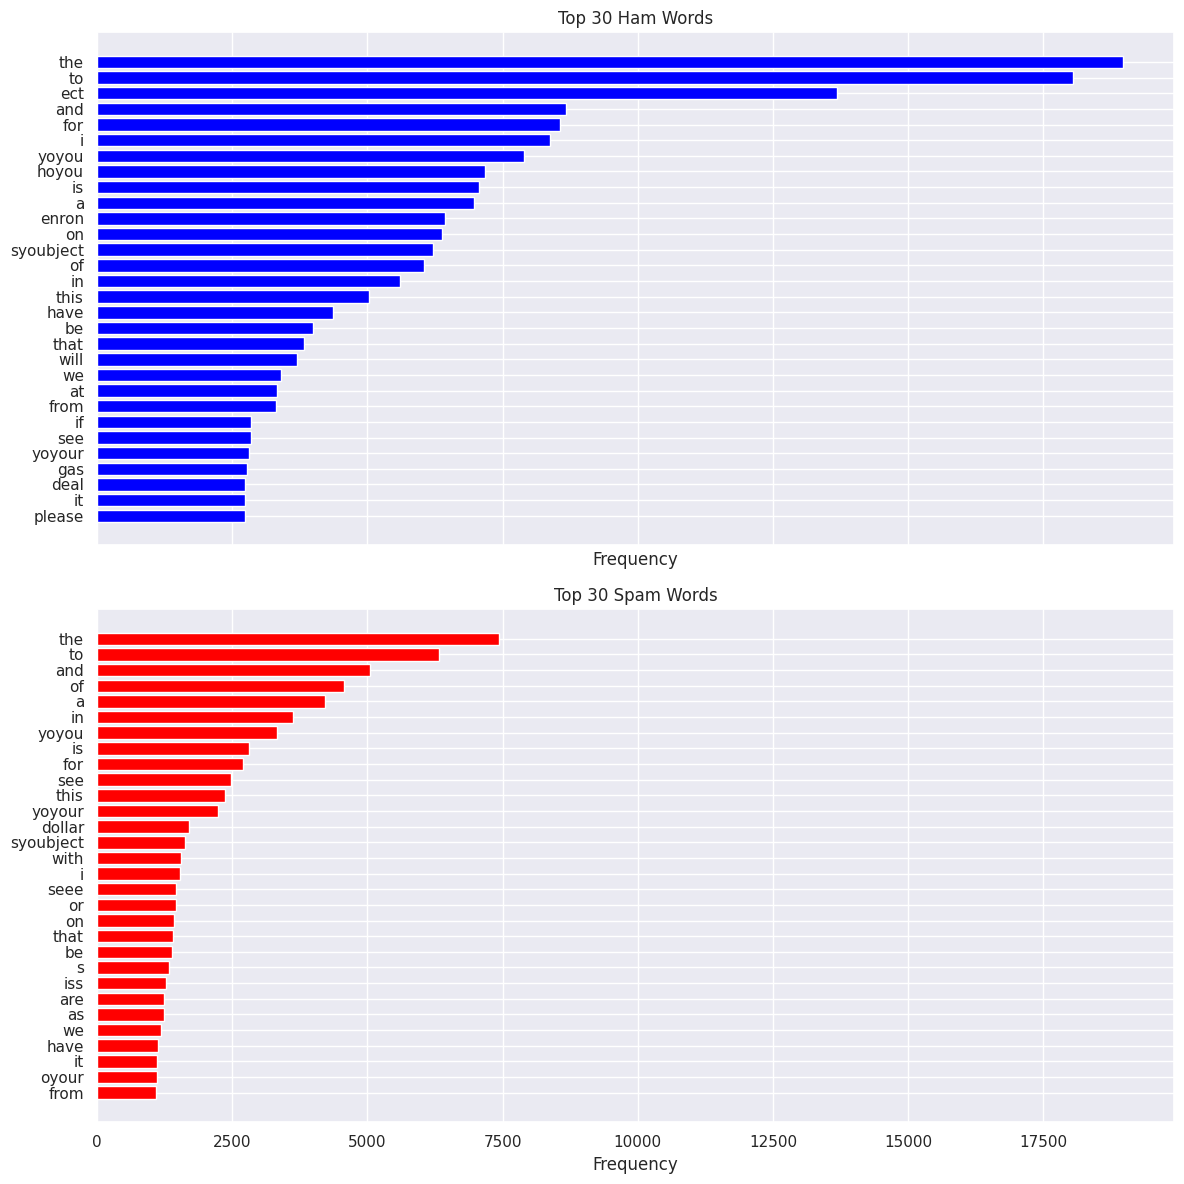

In [33]:

ham_messages = df[df['Category'] == 0]['Processed_Message']
spam_messages = df[df['Category'] == 1]['Processed_Message']


ham_words = [word for message in ham_messages for word in message.split()]
spam_words = [word for message in spam_messages for word in message.split()]

ham_word_freq = Counter(ham_words)
spam_word_freq = Counter(spam_words)

top_30_ham = ham_word_freq.most_common(30)
top_30_spam = spam_word_freq.most_common(30)

ham_df = pd.DataFrame(top_30_ham, columns=['Word', 'Frequency'])
spam_df = pd.DataFrame(top_30_spam, columns=['Word', 'Frequency'])

fig, axs = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

axs[0].barh(ham_df['Word'], ham_df['Frequency'], color='blue')
axs[0].set_title('Top 30 Ham Words')
axs[0].set_xlabel('Frequency')
axs[0].invert_yaxis()  # To display the most frequent words at the top

axs[1].barh(spam_df['Word'], spam_df['Frequency'], color='red')
axs[1].set_title('Top 30 Spam Words')
axs[1].set_xlabel('Frequency')
axs[1].invert_yaxis()  # To display the most frequent words at the top

plt.tight_layout()
plt.show()

####Initialize and Fit CountVectorizer
This process prepares the data for machine learning models by representing text as numerical features.

In [34]:
cv = CountVectorizer()

X = cv.fit_transform(df['Processed_Message']).toarray()
y = df['Category']

####Split Data into Training and Testing Sets

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:

def train_and_predict_models(X_train, X_test, y_train, y_test):
    # Logistic Regression with tuned parameters
    lr_model = LogisticRegression(C=0.1, solver='liblinear', max_iter=500)
    lr_model.fit(X_train, y_train)
    lr_pred = lr_model.predict(X_test)

    # Gaussian Naive Bayes
    gnb_model = GaussianNB()
    gnb_model.fit(X_train, y_train)
    gnb_pred = gnb_model.predict(X_test)

    # Support Vector Machines (SVM) with tuned parameters
    svm_model = SVC(C=10.0, kernel='rbf', gamma='auto')
    svm_model.fit(X_train, y_train)
    svm_pred = svm_model.predict(X_test)

    # Decision Trees with tuned parameters
    dt_model = DecisionTreeClassifier(max_depth=10, min_samples_split=5)
    dt_model.fit(X_train, y_train)
    dt_pred = dt_model.predict(X_test)

    # Random Forests with tuned parameters
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=10)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)

    # XGBoost Classifier with tuned parameters
    xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5)
    xgb_model.fit(X_train, y_train)
    xgb_pred = xgb_model.predict(X_test)

    return {
        'Logistic Regression': lr_pred,
        'Gaussian Naive Bayes': gnb_pred,
        'SVM': svm_pred,
        'Decision Tree': dt_pred,
        'Random Forest': rf_pred,
        'XGBoost': xgb_pred
    }

####Evaluation of Model Performance Metrics

In [37]:

predictions = train_and_predict_models(X_train, X_test, y_train, y_test)


def calculate_metrics(predictions, y_test):
    metrics = {}
    for model_name, preds in predictions.items():
        metrics[model_name] = {
            'Accuracy': accuracy_score(y_test, preds),
            'Precision': precision_score(y_test, preds, average='weighted'),
            'Recall': recall_score(y_test, preds, average='weighted'),
            'F1 Score': f1_score(y_test, preds, average='weighted'),
            'Confusion Matrix': confusion_matrix(y_test, preds)
        }
    return metrics

model_metrics = calculate_metrics(predictions, y_test)

for model_name, metrics in model_metrics.items():
    print(f"{model_name} Metrics:")
    print(f"  Accuracy: {metrics['Accuracy']:.4f}")
    print(f"  Precision: {metrics['Precision']:.4f}")
    print(f"  Recall: {metrics['Recall']:.4f}")
    print(f"  F1 Score: {metrics['F1 Score']:.4f}")
    print(f"  Confusion Matrix:\n{metrics['Confusion Matrix']}\n")

Logistic Regression Metrics:
  Accuracy: 0.9547
  Precision: 0.9549
  Recall: 0.9547
  F1 Score: 0.9535
  Confusion Matrix:
[[1562   15]
 [  77  376]]

Gaussian Naive Bayes Metrics:
  Accuracy: 0.9276
  Precision: 0.9274
  Recall: 0.9276
  F1 Score: 0.9275
  Confusion Matrix:
[[1505   72]
 [  75  378]]

SVM Metrics:
  Accuracy: 0.8365
  Precision: 0.8529
  Recall: 0.8365
  F1 Score: 0.8005
  Confusion Matrix:
[[1568    9]
 [ 323  130]]

Decision Tree Metrics:
  Accuracy: 0.8931
  Precision: 0.8923
  Recall: 0.8931
  F1 Score: 0.8853
  Confusion Matrix:
[[1541   36]
 [ 181  272]]

Random Forest Metrics:
  Accuracy: 0.8335
  Precision: 0.8629
  Recall: 0.8335
  F1 Score: 0.7920
  Confusion Matrix:
[[1577    0]
 [ 338  115]]

XGBoost Metrics:
  Accuracy: 0.9493
  Precision: 0.9491
  Recall: 0.9493
  F1 Score: 0.9480
  Confusion Matrix:
[[1555   22]
 [  81  372]]



####Visualization of Performance Metrics for Various Machine Learning Models

<ipython-input-38-9c306ee76648>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha="right")
<ipython-input-38-9c306ee76648>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha="right")
<ipython-input-38-9c306ee76648>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45, ha="right")
<ipython-input-38-9c306ee76648>:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[3].set_xticklabels(ax[3].get_xticklabels(), rotation=45, ha="right")


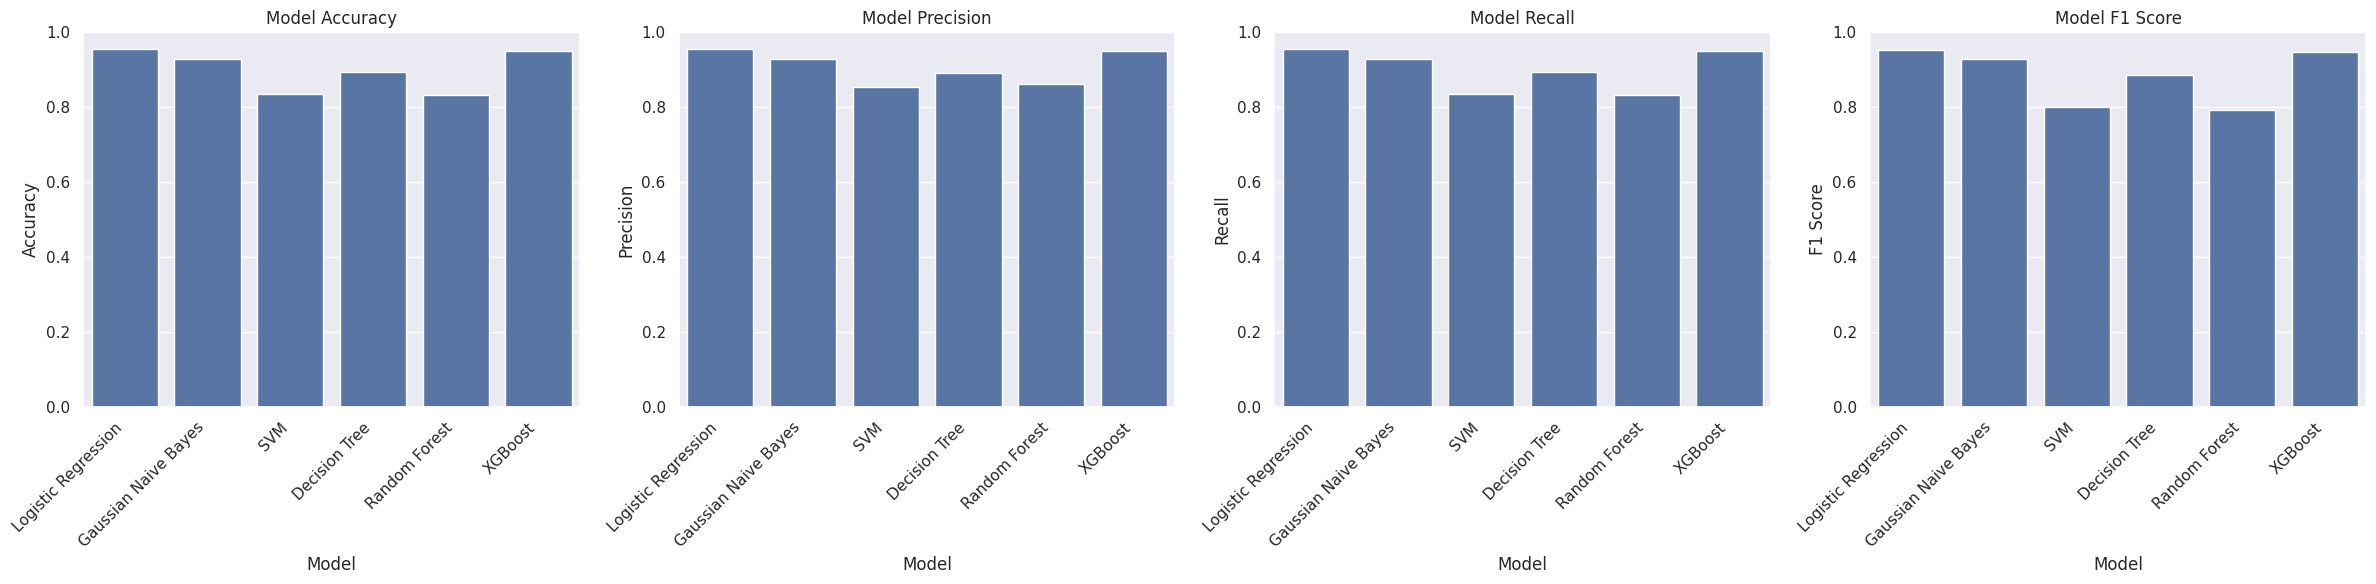

In [38]:
metrics = {
    'Model': ['Logistic Regression', 'Gaussian Naive Bayes', 'SVM', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy': [model_metrics['Logistic Regression']['Accuracy'], model_metrics['Gaussian Naive Bayes']['Accuracy'],
                 model_metrics['SVM']['Accuracy'], model_metrics['Decision Tree']['Accuracy'],
                 model_metrics['Random Forest']['Accuracy'], model_metrics['XGBoost']['Accuracy']],
    'Precision': [model_metrics['Logistic Regression']['Precision'], model_metrics['Gaussian Naive Bayes']['Precision'],
                  model_metrics['SVM']['Precision'], model_metrics['Decision Tree']['Precision'],
                  model_metrics['Random Forest']['Precision'], model_metrics['XGBoost']['Precision']],
    'Recall': [model_metrics['Logistic Regression']['Recall'], model_metrics['Gaussian Naive Bayes']['Recall'],
               model_metrics['SVM']['Recall'], model_metrics['Decision Tree']['Recall'],
               model_metrics['Random Forest']['Recall'], model_metrics['XGBoost']['Recall']],
    'F1 Score': [model_metrics['Logistic Regression']['F1 Score'], model_metrics['Gaussian Naive Bayes']['F1 Score'],
                 model_metrics['SVM']['F1 Score'], model_metrics['Decision Tree']['F1 Score'],
                 model_metrics['Random Forest']['F1 Score'], model_metrics['XGBoost']['F1 Score']]
}

metrics_df = pd.DataFrame(metrics)


fig, ax = plt.subplots(1, 4, figsize=(24, 6))

# Accuracy Plot
sns.barplot(x='Model', y='Accuracy', data=metrics_df, ax=ax[0])
ax[0].set_title('Model Accuracy')
ax[0].set_ylim(0, 1)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha="right")

# Precision Plot
sns.barplot(x='Model', y='Precision', data=metrics_df, ax=ax[1])
ax[1].set_title('Model Precision')
ax[1].set_ylim(0, 1)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha="right")

# Recall Plot
sns.barplot(x='Model', y='Recall', data=metrics_df, ax=ax[2])
ax[2].set_title('Model Recall')
ax[2].set_ylim(0, 1)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45, ha="right")

# F1 Score Plot
sns.barplot(x='Model', y='F1 Score', data=metrics_df, ax=ax[3])
ax[3].set_title('Model F1 Score')
ax[3].set_ylim(0, 1)
ax[3].set_xticklabels(ax[3].get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()

####Creating a DataFrame to Display Performance Metrics for Various Machine Learning Models

In [40]:
import pandas as pd

metrics_df = pd.DataFrame(metrics)

metrics_df


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.954680,0.954943,0.954680,0.953452
1,Gaussian Naive Bayes,0.927586,0.927420,0.927586,0.927500
2,SVM,0.836453,0.852859,0.836453,0.800484
3,Decision Tree,0.893103,0.892263,0.893103,0.885269
4,Random Forest,0.833498,0.862885,0.833498,0.792015
5,XGBoost,0.949261,0.949077,0.949261,0.947960
